In [76]:
import tensorflow as tf
from tensorflow.python.client import device_lib 
from tensorflow.python.client import device_lib

In [77]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [78]:
import IPython.display as display

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

np.set_printoptions(suppress=True)

In [79]:
# import the needed packages
import matplotlib.image as img
from tensorflow import keras
# shortcut to the ImageDataGenerator class
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

In [80]:
path='./dataset'
data_dir=pathlib.Path(path)

In [81]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

True

In [82]:
path="D:\CODE\CNN\\final_project\\finalCNN\dataset"
data_dir=pathlib.Path(path)
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

38841

In [83]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])
CLASS_NAMES

array(['cars', 'cats', 'dogs', 'flowers', 'human', 'motobikes', 'phones'],
      dtype='<U9')

In [84]:
image_generator=ImageDataGenerator(rescale=1./255)

In [85]:
BATCH_SIZE = 32
IMG_HEIGHT = 256
IMG_WIDTH = 256
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [86]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 38841 images belonging to 7 classes.


In [87]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

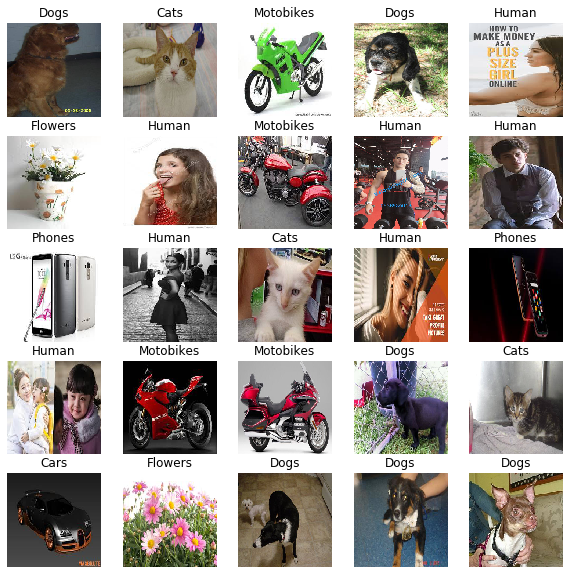

In [88]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [89]:
imgDataGen=ImageDataGenerator(
    validation_split=0.1,
    rescale=0.2,
    horizontal_flip=True,
    zoom_range=0.3,
    rotation_range=15.,
)

In [90]:
train_dataset = imgDataGen.flow_from_directory(
    directory=str(data_dir),
    target_size = (IMG_HEIGHT, IMG_WIDTH), 
    classes = list(CLASS_NAMES),
    batch_size = BATCH_SIZE,
    subset = 'training'
)

val_dataset = imgDataGen.flow_from_directory(
    directory=str(data_dir),
    target_size = (IMG_HEIGHT, IMG_WIDTH), 
    classes = list(CLASS_NAMES),
    batch_size =BATCH_SIZE,
    subset = 'validation'
)

Found 34961 images belonging to 7 classes.
Found 3880 images belonging to 7 classes.


In [91]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(IMG_WIDTH,IMG_HEIGHT,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=7, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 30, 30, 128)      

In [92]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])

In [93]:
model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=40,
)

Epoch 1/40
1093/1093 [==============================] - 327s 299ms/step - loss: 0.3847 - acc: 0.8949 - val_loss: 0.1322 - val_acc: 0.9220
Epoch 2/40
1093/1093 [==============================] - 338s 309ms/step - loss: 0.1788 - acc: 0.9277 - val_loss: 0.1503 - val_acc: 0.9281
Epoch 3/40
1093/1093 [==============================] - 371s 340ms/step - loss: 0.1537 - acc: 0.9383 - val_loss: 0.1965 - val_acc: 0.9342
Epoch 4/40
1093/1093 [==============================] - 406s 371ms/step - loss: 0.1333 - acc: 0.9466 - val_loss: 0.1093 - val_acc: 0.9504
Epoch 5/40
1093/1093 [==============================] - 376s 344ms/step - loss: 0.1207 - acc: 0.9521 - val_loss: 0.0841 - val_acc: 0.9546
Epoch 6/40
1093/1093 [==============================] - 381s 349ms/step - loss: 0.1091 - acc: 0.9570 - val_loss: 0.1313 - val_acc: 0.9511
Epoch 7/40
1093/1093 [==============================] - 382s 350ms/step - loss: 0.0977 - acc: 0.9617 - val_loss: 0.1050 - val_acc: 0.9635
Epoch 8/40
1093/1093 [============

In [94]:
import h5py
from keras.models import load_model
model.save('trained-model.h5')

In [95]:
model_new=tf.keras.models.load_model('trained-model.h5')
model_new.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 30, 30, 128)      